<a href="https://colab.research.google.com/github/Aastha1794/Deep_Learning/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS6421 Final Project: Deep Learning


**Implementing Real-World examples**

This assignment is the core programming assignment for Deep Learning (CS6421). You will be given a tutorial introduction to the deep autoencoder, and will then need to use this model to solve two real-world problems:
- text noise removal
- pedestrian safety analysis on footpaths


## Setup
We start by importing the libraries and functions that we will need.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#try:
  # The %tensorflow_version magic only works in colab.
  # tensorflow_version 2.x
#except Exception:
#  pass
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist

from numpy.random import seed
seed(1234)
tf.random.set_seed(
    seed
)

tf.random.set_seed(1234)
print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())

TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True


## Autoencoder model

The encoder and decoder are defined as:
$$ z = f\big(h_{e}(x)\big)$$
$$ \hat{x} = f\big(h_{d}(z)\big),$$
where $z$ is the compressed data representation generated by encoder $h_{e}$, and $\hat{x}$ is the reconstructed data generated by decoder $h_{d}$ based on $z$.

# Encoder - Decoder Models for 3 different Dense layers
Building 3 encoder and decoder layers for 3 different Dense Architectures

In [0]:
#Encoder with 1 layer
class Dense_Encoder1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Dense_Encoder1, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [0]:
#Encoder with 2 layers
class Dense_Encoder2(tf.keras.layers.Layer):
    print("1")
    def __init__(self, intermediate_dim):
        super(Dense_Encoder2, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation1 = self.hidden_layer1(input_features)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

1


In [3]:
#Encoder with 3 layers
class Dense_Encoder3(tf.keras.layers.Layer):
    print("1")
    def __init__(self, intermediate_dim):
        super(Dense_Encoder3, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=(intermediate_dim)/2, activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units=(intermediate_dim/2)/2, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=(intermediate_dim/2)/2, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation1 = self.hidden_layer1(input_features)
        activation2 = self.hidden_layer2(activation1)
        activation3 = self.hidden_layer3(activation2)
        return self.output_layer(activation3)

1


In [0]:
#Decoder with 1 layer
class Dense_Decoder1(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Dense_Decoder1, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)
      

In [4]:
#Decoder with 3 layers
class Dense_Decoder3(tf.keras.layers.Layer):
    print("2")
    def __init__(self, intermediate_dim, original_dim):
        super(Dense_Decoder3, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=(intermediate_dim/2)/2, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=(intermediate_dim)/2, activation=tf.nn.relu)
        self.hidden_layer3 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation1 = self.hidden_layer1(code)
        activation2 = self.hidden_layer2(activation1)
        activation3 = self.hidden_layer3(activation2)
        return self.output_layer(activation3)


2


In [5]:
#Decoder with 2 layers
class Dense_Decoder2(tf.keras.layers.Layer):
    print("2")
    def __init__(self, intermediate_dim, original_dim):
        super(Dense_Decoder2, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation1 = self.hidden_layer1(code)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

2


In [6]:
#Autoencoder with 1 layer
class Autoencoder1(tf.keras.Model):
  print("3")
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder1, self).__init__()
    self.loss = []
    self.encoder = Dense_Encoder1(intermediate_dim=intermediate_dim)
    self.decoder = Dense_Decoder1(intermediate_dim=intermediate_dim, original_dim=original_dim)
  
  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

3


In [7]:
#Autoencoder with 2 layers
class Autoencoder2(tf.keras.Model):
  print("3")
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder2, self).__init__()
    self.loss = []
    self.encoder = Dense_Encoder2(intermediate_dim=intermediate_dim)
    self.decoder = Dense_Decoder2(intermediate_dim=intermediate_dim, original_dim=original_dim)
  
  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

3


In [8]:
#Autoencoder with 3 layers
class Autoencoder3(tf.keras.Model):
  print("3")
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder3, self).__init__()
    self.loss = []
    self.encoder = Dense_Encoder3(intermediate_dim=intermediate_dim)
    self.decoder = Dense_Decoder3(intermediate_dim=intermediate_dim, original_dim=original_dim)
  
  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

3


**Defining Loss Function ( Reconstruction Error )**

In [0]:
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

**Forward pass and optimization**

In [0]:

def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  return reconstruction_error

**The training loop**

In [0]:
def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))

**Process the dataset**

In [0]:
#Basic dataset
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
print(type(x_train))
x_train = x_train / 255.
x_test = x_test / 255
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))
training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)
x_train.shape
x_test.shape


11493376/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>


(10000, 784)

**Train the model**

Dense Architecture with 1 hidden layer

In [0]:
model1 = Autoencoder1(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
train_loop(model1, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 8.391011238098145
Epoch 2/100. Loss: 5.420058727264404
Epoch 3/100. Loss: 5.008363723754883
Epoch 4/100. Loss: 4.832361698150635
Epoch 5/100. Loss: 4.733372688293457
Epoch 6/100. Loss: 4.621338844299316
Epoch 7/100. Loss: 4.596274375915527
Epoch 8/100. Loss: 4.541382789611816
Epoch 9/100. Loss: 4.498878479003906
Epoch 10/100. Loss: 4.456760406494141
Epoch 11/100. Loss: 4.44646692276001
Epoch 12/100. Loss: 4.440479278564453
Epoch 13/100. Loss: 4.386200904846191
Epoch 14/100. Loss: 4.407940864562988
Epoch 15/100. Loss: 4.372212886810303
Epoch 16/100. Loss: 4.378497123718262
Epoch 17/100. Loss: 4.369649887084961
Epoch 18/100. Loss: 4.340267658233643
Epoch 19/100. Loss: 4.3476433753967285
Epoch 20/100. Loss: 4.332640647888184
Epoch 21/100. Loss: 4.326165199279785
Epoch 22/100. Loss: 4.333654403686523
Epoch 23/100. Loss: 4.315567493438721
Epoch 24/100. Loss: 4.306231498718262
Epoch 25/100. Loss: 4.289769649505615
Epoch 26/100. Loss: 4.290628910064697
Epoch 27/100. Loss: 4

Dense Architecture with 2 hidden layers

In [0]:
model2 = Autoencoder2(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model2, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 11.504650115966797
Epoch 2/100. Loss: 7.397731304168701
Epoch 3/100. Loss: 6.304713726043701
Epoch 4/100. Loss: 5.7025370597839355
Epoch 5/100. Loss: 5.308376312255859
Epoch 6/100. Loss: 5.141451358795166
Epoch 7/100. Loss: 4.981734275817871
Epoch 8/100. Loss: 4.840504169464111
Epoch 9/100. Loss: 4.7103118896484375
Epoch 10/100. Loss: 4.649835109710693
Epoch 11/100. Loss: 4.5470967292785645
Epoch 12/100. Loss: 4.527094841003418
Epoch 13/100. Loss: 4.4391045570373535
Epoch 14/100. Loss: 4.386890888214111
Epoch 15/100. Loss: 4.346169948577881
Epoch 16/100. Loss: 4.2531890869140625
Epoch 17/100. Loss: 4.202934741973877
Epoch 18/100. Loss: 4.1747050285339355
Epoch 19/100. Loss: 4.1433281898498535
Epoch 20/100. Loss: 4.131279468536377
Epoch 21/100. Loss: 4.1347126960754395
Epoch 22/100. Loss: 4.136056423187256
Epoch 23/100. Loss: 4.1552629470825195
Epoch 24/100. Loss: 4.049208641052246
Epoch 25/100. Loss: 4.109565734863281
Epoch 26/100. Loss: 4.066689491271973
Epoch 27/10

Dense Architecture with 3 hidden layers

In [0]:
model3 = Autoencoder3(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model3, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 12.723112106323242
Epoch 2/100. Loss: 9.17767333984375
Epoch 3/100. Loss: 8.065512657165527
Epoch 4/100. Loss: 7.549341201782227
Epoch 5/100. Loss: 7.273525238037109
Epoch 6/100. Loss: 7.167731761932373
Epoch 7/100. Loss: 7.019042491912842
Epoch 8/100. Loss: 6.886867523193359
Epoch 9/100. Loss: 6.768101692199707
Epoch 10/100. Loss: 6.618387699127197
Epoch 11/100. Loss: 6.523224830627441
Epoch 12/100. Loss: 6.477406024932861
Epoch 13/100. Loss: 6.388544082641602
Epoch 14/100. Loss: 6.370235919952393
Epoch 15/100. Loss: 6.274855136871338
Epoch 16/100. Loss: 6.1890058517456055
Epoch 17/100. Loss: 6.149240016937256
Epoch 18/100. Loss: 6.085774898529053
Epoch 19/100. Loss: 5.989795207977295
Epoch 20/100. Loss: 5.966047763824463
Epoch 21/100. Loss: 5.906303405761719
Epoch 22/100. Loss: 5.860383033752441
Epoch 23/100. Loss: 5.8374247550964355
Epoch 24/100. Loss: 5.881331443786621
Epoch 25/100. Loss: 5.865865707397461
Epoch 26/100. Loss: 5.768707752227783
Epoch 27/100. Loss:

**Plot the in-training Performance**

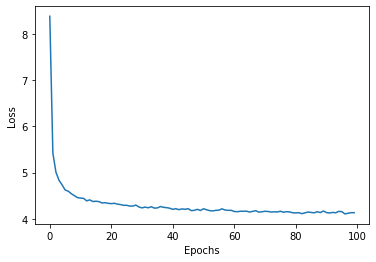

In [0]:
#1 hidden dense layer
plt.plot(range(100), model1.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


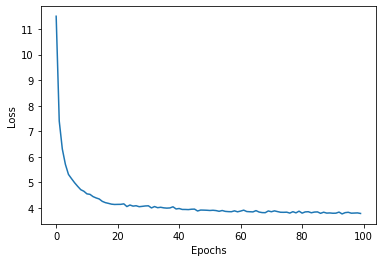

In [0]:
#2 hidden dense layers
plt.plot(range(100), model2.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

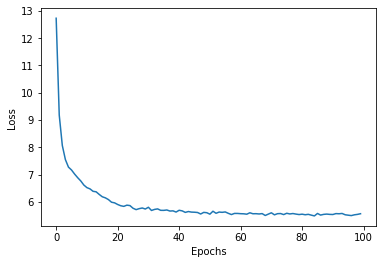

In [0]:
#2 hidden dense layers
plt.plot(range(100), model3.loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**Predictions**

 Prediction - 1 hidden Layer


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



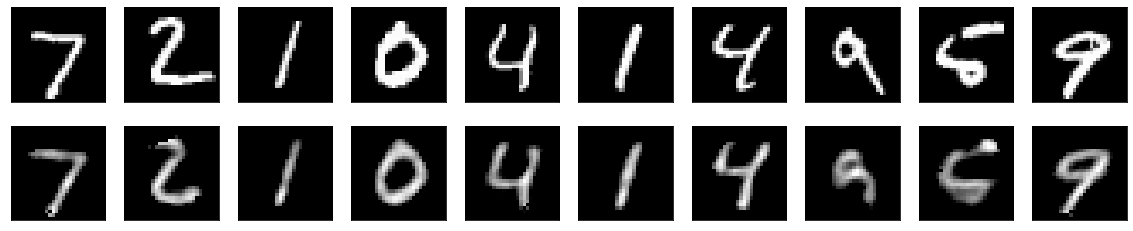

In [0]:
#Basic - Dense1
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model1(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Prediction - 2 Hidden Layers


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



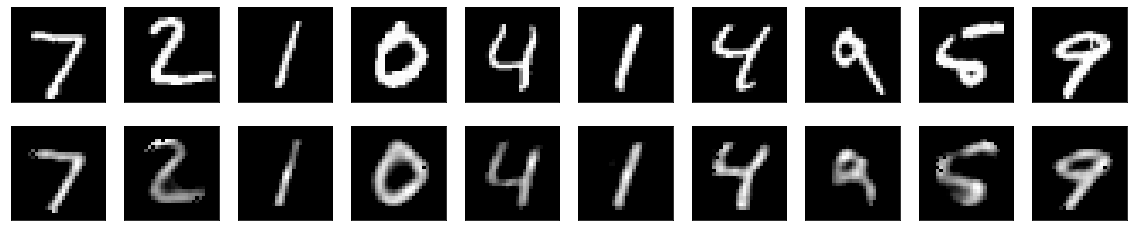

In [0]:
#Predictions - Basic Dense 2
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model2(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Prediction - 3 Hidden Layers


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



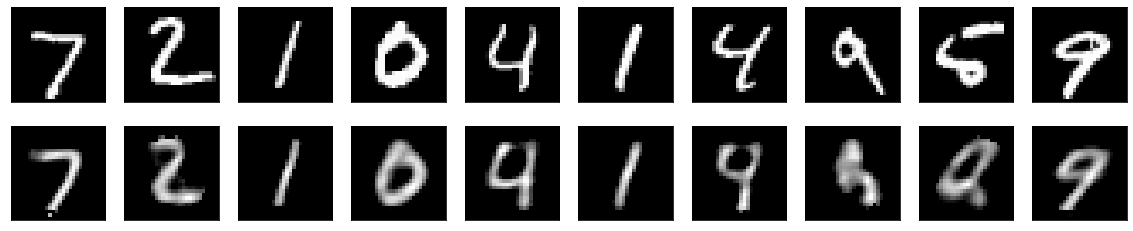

In [0]:
#Predictions - Basic Dense 3
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model3(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Encoder - Decoder Models for 2 different CNN layers
Building 3 encoder and decoder layers for 2 different CNN Architectures

CNN Model - **Process the Dataset**

In [0]:
# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
# (x_train, _), (x_test, _) = load_data('../input/mnist.npz')
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

**Fitting CNN Models**

CNN Basic Model - Autoencoder

In [0]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_CNN_Basic = tf.keras.models.Model(input_img, decoded)
autoencoder_CNN_Basic.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_CNN_Basic.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [0]:
autoencoder_CNN_Basic.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2181 - val_loss: 0.1558
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1444 - val_loss: 0.1347
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1284 - val_loss: 0.1224
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1199 - val_loss: 0.1157
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1147 - val_loss: 0.1116
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1112 - val_loss: 0.1088
Epoch 7/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1087 - val_loss: 0.1065
Epoch 8/100
469/469 [==============================] - 3s 5ms/step - loss: 0.1068 - val_loss: 0.1046
Epoch 9/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1053 - val_loss: 0.1034
Epoch 10/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1040 - val_lo

**Predictions for CNN Basic Model**

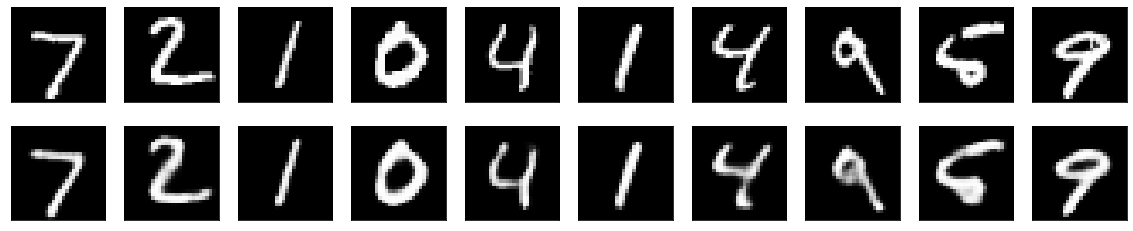

In [0]:
#Predictions for CNN Basic
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(autoencoder_CNN_Basic(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


CNN Complex Model - Autoencoder and fitting model




*   3 Convolution layers with 16,8,8 nodes in encoder each followed by Max pooling layer
*   3 Convolution layers in decoder with 8,8,16 nodes each followed by UpSampling layer to reach the original size of image
*   Batch Normalization after each encoder and decoder layer
*   Filter size has been changed to 5*5
*   Optimizer used - Adam
*   Max pooling and Upsampling layer size - 2*2





In [0]:
#complex layer
from keras import regularizers
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (5, 5), padding='same',activation = "relu",activity_regularizer=regularizers.l1(10e-10))(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), (2,2) , padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), padding='same',activation = "relu",activity_regularizer=regularizers.l1(10e-10))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), (2,2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), padding='same',activation = "relu",activity_regularizer=regularizers.l1(10e-10))(x)
x = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), (2,2), padding='same')(x)


# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (5, 5), padding='same',activation = "relu",activity_regularizer=regularizers.l1(10e-10))(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5),padding='same',activation = "relu",activity_regularizer=regularizers.l1(10e-10))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3),activation = "relu",activity_regularizer=regularizers.l1(10e-10))(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_CNN_Complex = tf.keras.models.Model(input_img, decoded)
autoencoder_CNN_Complex.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_CNN_Complex.summary()


Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         3208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 8)         32        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0   

In [0]:
autoencoder_CNN_Complex.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1443 - val_loss: 0.1331
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1182 - val_loss: 0.1105
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1093 - val_loss: 0.1046
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1040 - val_loss: 0.1005
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1010 - val_loss: 0.0987
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0988 - val_loss: 0.0962
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0971 - val_loss: 0.0949
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0953 - val_loss: 0.0940
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0946 - val_loss: 0.0925
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0931 - val_lo

**Predictions for CNN Complex Model**

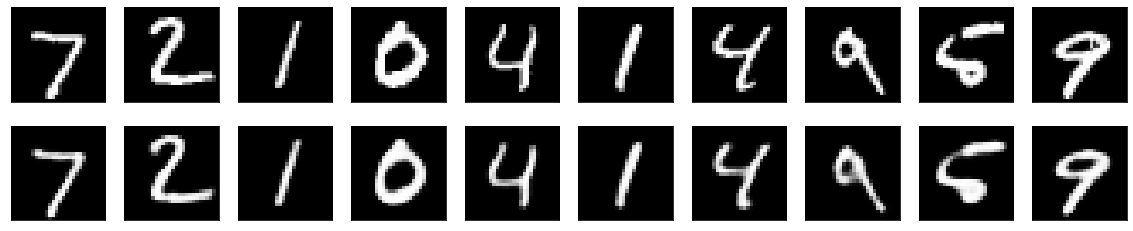

In [0]:
#Predictions for CNN Complex
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(autoencoder_CNN_Complex(x_test)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## **Comparing Dense and CNN Models Results** 





| Model Name | Loss Values |
| --- | --- |
| Dense with 1 hidden | 3.77 |
| Dense with 1 hidden | 5.56 |
| Dense with 1 hidden | 4.12 |
| CNN Basic           | 0.0872 |
| CNN Complex         | 0.0786 |


The above comparison shows the 3 different dense architectures with 1,2 and 3 hidden layers with size getting halved in each layer.

The loss values are observed to be increasing by adding layers and reducing the size in each subsequent layer.
This is because we are compressing the image and hence there is some loss of information in each layer because of which loss is increasing and accuracy is lower by increasing layer.

When Comparing dense layer with CNN models, we can see significant reduction in loss this is due to the fact that CNN works better in case of image data when compared to dense architecture.

When the changes has been made to the basic CNN model by increasing filter size and batch normalization, we can see the loss dropped even more. Different image plots have been shown above which indicates the prediction done by all models.
The loss is calculated using binary cross entropy in case of CNN models and mean squared error in case of Dense architecture

## **Part 2 Denoising Autoencoder**

In [0]:
#Denosing Dense
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.
x_test = x_test / 255
x_train = x_train.astype(np.float32)
# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train_noisy = np.reshape(x_train_noisy, (x_train_noisy.shape[0], 784))
x_test_noisy = np.reshape(x_test_noisy, (x_test_noisy.shape[0], 784))
x_train_noisy = x_train_noisy.astype(np.float32)
training_dataset = tf.data.Dataset.from_tensor_slices(x_train_noisy).batch(256)
x_train_noisy.shape

(60000, 784)

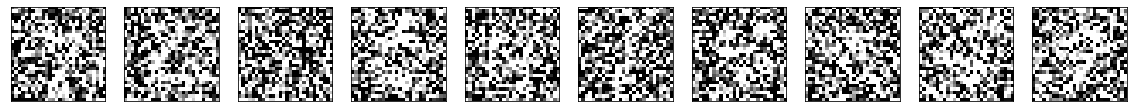

In [0]:
# Plot figures to show what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Dense Architecture - model fitting

In [0]:
dense_model = Autoencoder3(intermediate_dim=256, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(dense_model, opt, loss, training_dataset, 100)

Epoch 1/100. Loss: 335.7601318359375
Epoch 2/100. Loss: 52.72674560546875
Epoch 3/100. Loss: 52.70429611206055
Epoch 4/100. Loss: 52.48023223876953
Epoch 5/100. Loss: 52.15990447998047
Epoch 6/100. Loss: 52.14130401611328
Epoch 7/100. Loss: 52.07859802246094
Epoch 8/100. Loss: 51.65875244140625
Epoch 9/100. Loss: 51.58341979980469
Epoch 10/100. Loss: 51.45751953125
Epoch 11/100. Loss: 51.30854797363281
Epoch 12/100. Loss: 51.30506896972656
Epoch 13/100. Loss: 51.23041915893555
Epoch 14/100. Loss: 51.10596466064453
Epoch 15/100. Loss: 51.09830093383789
Epoch 16/100. Loss: 51.09400939941406
Epoch 17/100. Loss: 51.0235710144043
Epoch 18/100. Loss: 50.75310516357422
Epoch 19/100. Loss: 50.35490036010742
Epoch 20/100. Loss: 50.137264251708984
Epoch 21/100. Loss: 49.81158447265625
Epoch 22/100. Loss: 49.721439361572266
Epoch 23/100. Loss: 49.517189025878906
Epoch 24/100. Loss: 53.50326156616211
Epoch 25/100. Loss: 51.52040100097656
Epoch 26/100. Loss: 51.44306182861328
Epoch 27/100. Loss: 51

Predictions - Dense


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



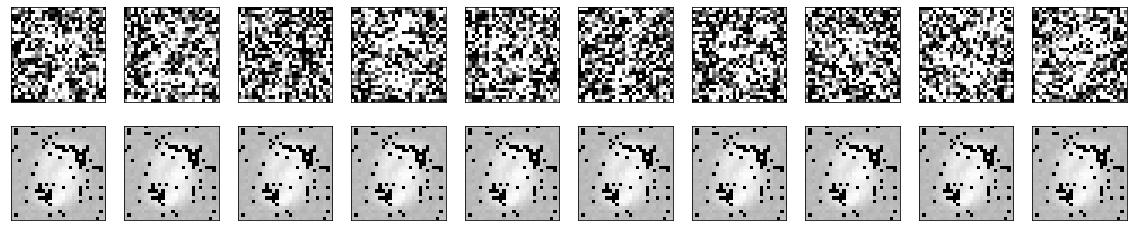

In [0]:
#For noisy data - Dense
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(dense_model(x_test_noisy)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

CNN data preparation 

In [0]:
#DeNoising CNN
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Introduce noise with a probability factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

Denoising with basic CNN 

In [0]:
autoencoder_CNN_Basic.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2627 - val_loss: 0.2402
Epoch 2/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2355 - val_loss: 0.2307
Epoch 3/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2293 - val_loss: 0.2264
Epoch 4/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2255 - val_loss: 0.2230
Epoch 5/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2226 - val_loss: 0.2206
Epoch 6/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2203 - val_loss: 0.2190
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2185 - val_loss: 0.2166
Epoch 8/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2169 - val_loss: 0.2150
Epoch 9/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2157 - val_loss: 0.2141
Epoch 10/100
469/469 [==============================] - 3s 5ms/step - loss: 0.2146 - val_lo

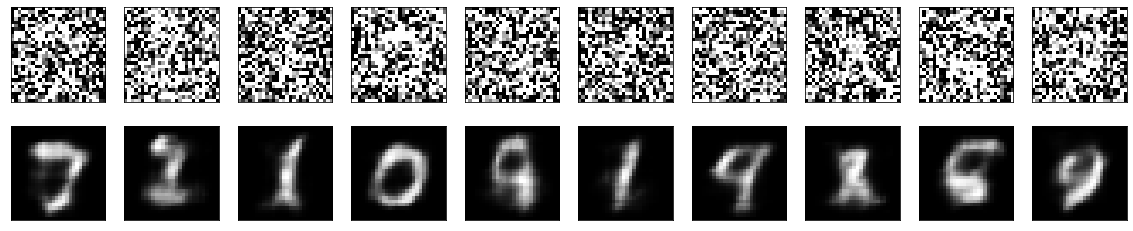

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(autoencoder_CNN_Basic(x_test_noisy)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Denoising with Complex CNN

In [0]:
autoencoder_CNN_Complex.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test_noisy, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1937 - val_loss: 0.1833
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1777 - val_loss: 0.1743
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1740 - val_loss: 0.1710
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.1718 - val_loss: 0.1702
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1704 - val_loss: 0.1683
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1694 - val_loss: 0.1680
Epoch 7/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1684 - val_loss: 0.1669
Epoch 8/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1676 - val_loss: 0.1660
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1671 - val_loss: 0.1658
Epoch 10/100
469/469 [==============================] - 4s 8ms/step - loss: 0.1664 - val_lo

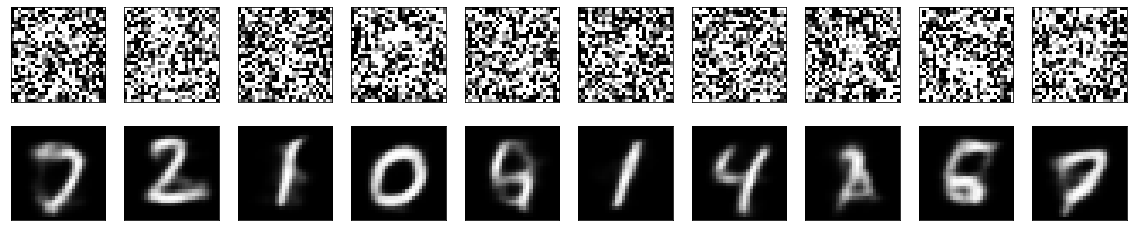

In [0]:
number = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(x_test_noisy[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(autoencoder_CNN_Complex(x_test_noisy)[index].numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

| Model Name | Loss Values |
| --- | --- |
| Dense with 3 hidden | 51.28 |
| CNN Basic           | 0.1933 |
| CNN Complex         | 0.1593 |


The above comparison shows the 3 architectures dense with 3 hidden layers , basic CNN and complex CNN.
Among these 3 models, CNN with complex architecture is performing best as was observed before.
The main difference between the two diiferent (fully connected dense layer and CNN ) is CNNs have convolution and pooling layers, where as dense architecture have only fully connected layers.

CNNs perform better for image data and are known to reduce the complexity of the model (faster training, needs fewer samples, reduces the chance of overfitting)

There are fewer parameters to learn in CNN which reduces the chance of overfitting as the model would be less complex than a fully connected network.

##**Part 3 Text Noise Removal**

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import os
from pathlib import Path
import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from keras.preprocessing.image import load_img, array_to_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input , BatchNormalization
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
from sklearn.model_selection import train_test_split
np.random.seed(111)
print('TensorFlow version:', tf.__version__)
print('Is Executing Eagerly?', tf.executing_eagerly())
! git clone https://github.com/Aastha1794/Deep_Learning.git

from zipfile import ZipFile 
with ZipFile("/content/Deep_Learning/train.zip", 'r') as zip: 
    print("Extracting")
    zip.extractall()
    print("done")

with ZipFile("/content/Deep_Learning/train_cleaned.zip", 'r') as zip: 
    print("Extracting")
    zip.extractall()
    print("done")

with ZipFile("/content/Deep_Learning/test.zip", 'r') as zip: 
    print("Extracting")
    zip.extractall()
    print("done")

train_path= "/content/train/"
train_images = os.listdir(train_path)
train_clean_path = "/content/train_cleaned/"
train_labels = os.listdir(train_clean_path)
test_path= "/content/test/"
test_labels = os.listdir(test_path)


TensorFlow version: 2.2.0-rc2
Is Executing Eagerly? True
Cloning into 'Deep_Learning'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 11 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.
Extracting
done
Extracting
done
Extracting
done


In [105]:
# Lets' define our autoencoder now

def build_autoencoder1():
    input_img = Input(shape=(420,540,1), name='image_input')
    
    #enoder 
    # enter encoder model here
    
    #decoder
    x = Conv2D(32, (3, 3), padding='same',activation = "relu")(input_img)
    x = BatchNormalization()(x)
    #x = tensorflow.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = MaxPooling2D((2, 2) , padding='same')(x)
    x = Conv2D(64, (3, 3), padding='same',activation = "relu")(x)
    x = BatchNormalization()(x)
    #x = tensorflow.keras.layers.LeakyReLU(alpha=0.1)(x)
    #x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), padding='same',activation = "relu")(x)
    x = BatchNormalization()(x)
    #x = tensorflow.keras.layers.LeakyReLU(alpha=0.1)(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)


    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = Conv2D(128, (3, 3), padding='same',activation = "relu")(encoded)
    #x = tensorflow.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3),padding='same',activation = "relu")(x)
    #x = tensorflow.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3),padding='same',activation = "relu")(x)
    #x = tensorflow.keras.layers.LeakyReLU(alpha=0.1)(x)
    #x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    
    #model
    autoencoder = Model(inputs=input_img, outputs=decoded)
    #autoencoder.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error',metrics=[RootMeanSquaredError()])
    autoencoder.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_squared_error')
    return autoencoder
autoencoder_CNN_Complex = build_autoencoder1()
autoencoder_CNN_Complex.summary()


Model: "model_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 420, 540, 1)       0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 420, 540, 32)      320       
_________________________________________________________________
batch_normalization_34 (Batc (None, 420, 540, 32)      128       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 210, 270, 32)      0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 210, 270, 64)      18496     
_________________________________________________________________
batch_normalization_35 (Batc (None, 210, 270, 64)      256       
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 210, 270, 128)     738

In [48]:
1e-4
10e-4

0.001

In [39]:
#CNN Basic
input_img = tf.keras.layers.Input(shape=(420, 540, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_CNN_Basic = tf.keras.models.Model(input_img, decoded)
autoencoder_CNN_Basic.compile(optimizer='adam', loss='mean_squared_error',metrics =['rmse'])
autoencoder_CNN_Basic.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 420, 540, 1)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 420, 540, 16)      160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 210, 270, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 210, 270, 8)       1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 105, 135, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 105, 135, 8)       584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 68, 8)         0   

Preparing Dataset

In [106]:
X = []
Y = []
Z = []
for img in train_images:
    img = load_img(train_path+"/"+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(train_clean_path+"/"+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)

for img in test_labels:
    img = load_img(test_path+"/"+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.

    Z.append(img)

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)
print("Size of Z : ", Z.shape)

# Split the dataset into training and validation. Always set the random state!!
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)
Size of Z :  (72, 420, 540, 1)
Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


Training CNN Basic Model and predicting

In [0]:
# Train your model
autoencoder_CNN_Basic.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_valid, y_valid))


s


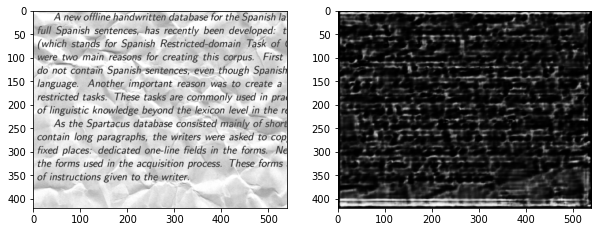

In [0]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder_CNN_Basic.predict(Z))
print("s")
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(Z[1]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label[1]), cmap='gray')
plt.show()


Training CNN Complex Model and predicting

In [107]:
# Train your model
autoencoder_CNN_Complex.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_valid, y_valid))


Train on 129 samples, validate on 15 samples
Epoch 1/100
129/129 [==============================] - 5s 35ms/step - loss: 0.1088 - val_loss: 0.1970
Epoch 2/100
 24/129 [====>.........................] - ETA: 3s - loss: 0.0607

ResourceExhaustedError: ignored

In [104]:
# Compute the prediction
predicted_label = np.squeeze(autoencoder_CNN_Complex.predict(Z))
print("s")
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(Z[1]), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label[1]), cmap='gray')
plt.show()

ResourceExhaustedError: ignored

Dense dataset preparation, autoencoder, fitting and prediction


In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], 226800))
y_train = np.reshape(y_train, (y_train.shape[0], 226800))
X_valid = np.reshape(X_valid, (X_valid.shape[0], 226800))
y_valid = np.reshape(y_valid, (y_valid.shape[0], 226800))



In [100]:
from keras.metrics import RootMeanSquaredError
def build_autoencoder():
    input_img = Input(shape=(226800,))
    # Encoder
    x = Dense(units = 64, activation = 'relu')(input_img)
    #x = Dense(units = 128, activation = tf.nn.relu)(x)
    x = Dense(128, activation = 'relu')(x)
    encoder = Dense(32, activation = tf.nn.relu)(x)

    # Decoder
    #x = Dense(32, activation = tf.nn.relu)(encoder)
    x = Dense(128, activation = tf.nn.relu)(encoder)
    x = Dense(128, activation = tf.nn.relu)(x)
    decoder = Dense(units = 226800, activation = tf.nn.relu)(x)

    #model
    autoencoder = Model(inputs=input_img, outputs=decoder)
    autoencoder.compile(loss='mse', optimizer=Adam(learning_rate=10e-4),metrics=[RootMeanSquaredError()])
    return autoencoder

autoencoder_Dense = build_autoencoder()
autoencoder_Dense.summary()


Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 226800)            0         
_________________________________________________________________
dense_80 (Dense)             (None, 64)                14515264  
_________________________________________________________________
dense_81 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_82 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_83 (Dense)             (None, 128)               4224      
_________________________________________________________________
dense_84 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_85 (Dense)             (None, 226800)            292

In [101]:
#from keras.callbacks import TensorBoard
#tensorboard = TensorBoard(log_dir="./tmp/autoencoder")

autoencoder_Dense.fit(X_train, y_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(X_valid, y_valid)
                )

Train on 129 samples, validate on 15 samples
Epoch 1/100
129/129 [==============================] - 0s 2ms/step - loss: 0.8572 - root_mean_squared_error: 0.9258 - val_loss: 0.6948 - val_root_mean_squared_error: 0.8335
Epoch 2/100
129/129 [==============================] - 0s 1ms/step - loss: 0.7015 - root_mean_squared_error: 0.8376 - val_loss: 0.4984 - val_root_mean_squared_error: 0.7060
Epoch 3/100
129/129 [==============================] - 0s 1ms/step - loss: 0.4986 - root_mean_squared_error: 0.7061 - val_loss: 0.4299 - val_root_mean_squared_error: 0.6557
Epoch 4/100
129/129 [==============================] - 0s 1ms/step - loss: 0.4292 - root_mean_squared_error: 0.6551 - val_loss: 0.3794 - val_root_mean_squared_error: 0.6159
Epoch 5/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3809 - root_mean_squared_error: 0.6172 - val_loss: 0.3593 - val_root_mean_squared_error: 0.5994
Epoch 6/100
129/129 [==============================] - 0s 1ms/step - loss: 0.3602 - root_m

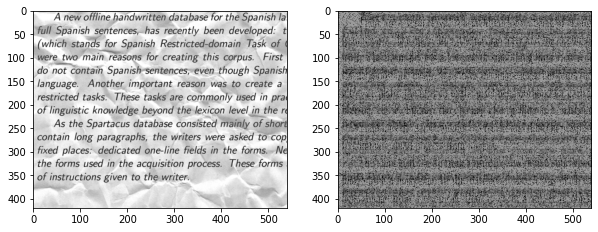

In [102]:
# Compute the prediction
Z = np.reshape(Z,(Z.shape[0],226800))
predicted_label = np.squeeze(autoencoder_Dense.predict(Z))
f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(Z[1].reshape(420,540) , cmap='gray')
ax[1].imshow(predicted_label[1].reshape(420,540), cmap='gray')
plt.show()

In [27]:
#!git clone https://github.com/keras-team/keras-tuner.git
%ls
%cd keras-tuner
!pip install -U keras-tuner
#from kerastuner.tuner import RandomSearch

AUTHORS          docs/        LICENSE     requirements.txt  tutorials/
CHANGELOG.md     examples/    pytest.ini  setup.py
CONTRIBUTING.md  kerastuner/  README.md   tests/
[Errno 2] No such file or directory: 'keras-tuner'
/content/keras-tuner
     |████████████████████████████████| 61kB 5.0MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=590e99527d335ce1f58565697448918b286297edd15d3c57e5bccbc8711ff0c3
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=d57d4f80c69fe89670d787eb692afcade99cc32a0fab80ae4b86fcda5106d9df
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [0]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [0]:
tuner = RandomSearch(build_autoencoder1, objective='val_accuracy',max_trials=1, )